In [6]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
import xgboost as xgb
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('../../datasets/wine_reviews/prepared/prepared_winemag-data-130k-v2.csv')
df = df.reindex(columns=['country', 'province', 'variety', 'winery', 'region_1', 'price', 'points'])
display(df)
display(df.info())

,country,province,variety,winery,region_1,price,points
0,2,1,0,0,0,0.064935,0.35
1,2,2,1,1,1,0.058442,0.35
2,2,1,2,2,0,0.396104,0.35
3,3,3,3,3,2,0.071429,0.35
4,0,4,4,4,3,0.077922,0.35
...,...,...,...,...,...,...,...
100342,4,5,0,6809,4,0.155844,0.50
100343,2,1,2,6027,12,0.461039,0.50
100344,4,5,5,8789,4,0.168831,0.50
100345,4,5,0,4214,4,0.181818,0.50


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100347 entries, 0 to 100346
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   country   100347 non-null  int64  
 1   province  100347 non-null  int64  
 2   variety   100347 non-null  int64  
 3   winery    100347 non-null  int64  
 4   region_1  100347 non-null  int64  
 5   price     100347 non-null  float64
 6   points    100347 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 5.4 MB


None

In [8]:
X = df.iloc[:, :-1].values
y = df['points'].values
display(X)
display(y)

array([[2.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.49350649e-02],
       [2.00000000e+00, 2.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 5.84415584e-02],
       [2.00000000e+00, 1.00000000e+00, 2.00000000e+00, 2.00000000e+00,
        0.00000000e+00, 3.96103896e-01],
       ...,
       [4.00000000e+00, 5.00000000e+00, 5.00000000e+00, 8.78900000e+03,
        4.00000000e+00, 1.68831169e-01],
       [4.00000000e+00, 5.00000000e+00, 0.00000000e+00, 4.21400000e+03,
        4.00000000e+00, 1.81818182e-01],
       [4.00000000e+00, 5.00000000e+00, 5.00000000e+00, 2.19900000e+03,
        4.00000000e+00, 1.10389610e-01]])

array([0.35, 0.35, 0.35, ..., 0.5 , 0.5 , 0.5 ])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
random_forest_regressor = RandomForestRegressor()
parameters = {
    'max_depth': [10, 20, 100],
    'n_estimators': [100, 200, 500],
    'min_samples_leaf': [1, 3, 5, 10],
    'max_features': [1, 5, 'sqrt'], 
}

In [37]:
grid_search = GridSearchCV(
    estimator=random_forest_regressor,
    param_grid=parameters,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=3,
    n_jobs=-1,
)

In [38]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV 3/3] END max_depth=10, max_features=1, min_samples_leaf=1, n_estimators=100;, score=-0.014 total time=   5.7s
[CV 1/3] END max_depth=10, max_features=1, min_samples_leaf=1, n_estimators=100;, score=-0.014 total time=   5.8s
[CV 2/3] END max_depth=10, max_features=1, min_samples_leaf=1, n_estimators=100;, score=-0.014 total time=   6.1s
[CV 1/3] END max_depth=10, max_features=1, min_samples_leaf=3, n_estimators=100;, score=-0.014 total time=   5.1s
[CV 2/3] END max_depth=10, max_features=1, min_samples_leaf=1, n_estimators=200;, score=-0.014 total time=  11.1s
[CV 1/3] END max_depth=10, max_features=1, min_samples_leaf=1, n_estimators=200;, score=-0.014 total time=  11.1s
[CV 3/3] END max_depth=10, max_features=1, min_samples_leaf=1, n_estimators=200;, score=-0.014 total time=  11.5s
[CV 2/3] END max_depth=10, max_features=1, min_samples_leaf=3, n_estimators=100;, score=-0.014 total time=   5.8s
[CV 3/3] END max_depth=10

/home/gui/src/unb/ia/ml/.venv/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 3/3] END max_depth=20, max_features=1, min_samples_leaf=5, n_estimators=100;, score=-0.012 total time=   9.9s
[CV 1/3] END max_depth=20, max_features=1, min_samples_leaf=1, n_estimators=500;, score=-0.012 total time= 1.2min
[CV 1/3] END max_depth=20, max_features=1, min_samples_leaf=5, n_estimators=200;, score=-0.012 total time=  18.5s
[CV 3/3] END max_depth=20, max_features=1, min_samples_leaf=1, n_estimators=500;, score=-0.012 total time= 1.1min
[CV 1/3] END max_depth=20, max_features=1, min_samples_leaf=3, n_estimators=500;, score=-0.012 total time=  54.6s
[CV 2/3] END max_depth=20, max_features=1, min_samples_leaf=5, n_estimators=200;, score=-0.013 total time=  18.7s
[CV 2/3] END max_depth=20, max_features=1, min_samples_leaf=3, n_estimators=500;, score=-0.012 total time=  54.2s
[CV 3/3] END max_depth=20, max_features=1, min_samples_leaf=5, n_estimators=200;, score=-0.012 total time=  19.4s
[CV 1/3] END max_depth=20, max_features=1, min_samples_leaf=10, n_estimators=100;, score

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 100],
                         'max_features': [1, 5, 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='neg_mean_squared_error', verbose=3)

In [39]:
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor score (MSE):", -grid_search.best_score_)

Melhores parâmetros: {'max_depth': 20, 'max_features': 1, 'min_samples_leaf': 1, 'n_estimators': 500}
Melhor score (MSE): 0.012069722867903754


In [40]:
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE no conjunto de teste:", mse)

MSE no conjunto de teste: 0.011745423146358938


In [41]:
y_pred = best_model.predict(X_test)

In [42]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Erro Quadrático Médio (MSE):", mse)
print("Erro Absoluto Médio (MAE):", mae)

Erro Quadrático Médio (MSE): 0.011745423146358938
Erro Absoluto Médio (MAE): 0.08439145465146636


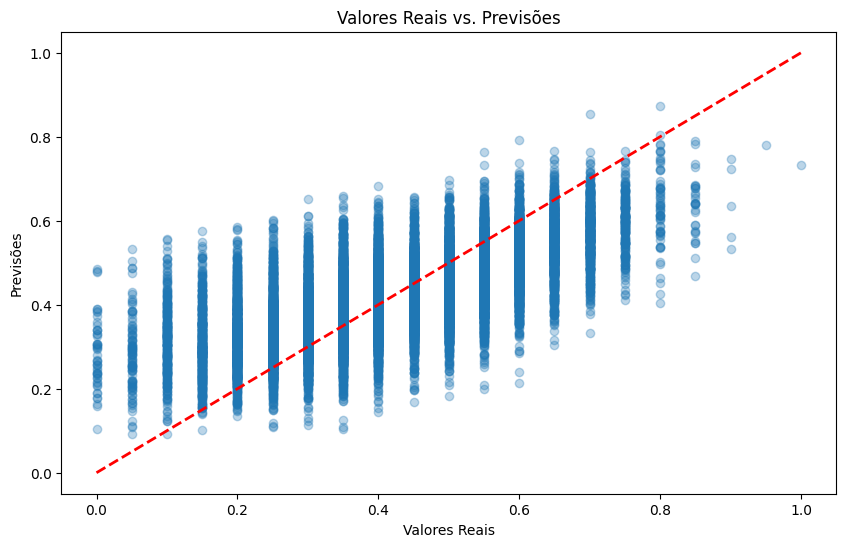

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Valores Reais vs. Previsões')
plt.show()